In [17]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from zipfile import ZipFile 
import tensorflow.keras.backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

In [18]:
train_zip = "/kaggle/input/carvana-image-masking-challenge/train.zip"
with ZipFile(train_zip, 'r') as zip_: 
    zip_.extractall('/kaggle/working')

In [19]:
train_mask_zip = "/kaggle/input/carvana-image-masking-challenge/train_masks.zip"
with ZipFile(train_mask_zip, 'r') as zip_: 
    zip_.extractall('/kaggle/working')

In [20]:
print("Train set:  ", len(os.listdir("/kaggle/working/train")))
print("Train masks:", len(os.listdir("/kaggle/working/train_masks")))

Train set:   5088
Train masks: 5088


In [21]:
car_ids = []
paths = []
for dirname, _, filenames in os.walk('/kaggle/working/train'):
    for filename in filenames:
        path = os.path.join(dirname, filename)    
        paths.append(path)
        
        car_id = filename.split(".")[0]
        car_ids.append(car_id)

d = {"id": car_ids, "car_path": paths}
df = pd.DataFrame(data = d)
df = df.set_index('id')
df


car_path
id                                                        
3a7a8f03e713_09  /kaggle/working/train/3a7a8f03e713_09.jpg
90b65c521a8b_05  /kaggle/working/train/90b65c521a8b_05.jpg
9dfaeb835626_15  /kaggle/working/train/9dfaeb835626_15.jpg
6d375bc2ece1_16  /kaggle/working/train/6d375bc2ece1_16.jpg
b24fd9084449_10  /kaggle/working/train/b24fd9084449_10.jpg
...                                                    ...
eb91b1c659a0_04  /kaggle/working/train/eb91b1c659a0_04.jpg
d46244bc42ed_05  /kaggle/working/train/d46244bc42ed_05.jpg
0d1a9caf4350_07  /kaggle/working/train/0d1a9caf4350_07.jpg
791c1a9775be_15  /kaggle/working/train/791c1a9775be_15.jpg
acb0fd30b83d_15  /kaggle/working/train/acb0fd30b83d_15.jpg

[5088 rows x 1 columns]

In [22]:
car_ids = []
mask_path = []
for dirname, _, filenames in os.walk('/kaggle/working/train_masks'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        mask_path.append(path)
        
        car_id = filename.split(".")[0]
        car_id = car_id.split("_mask")[0]
        car_ids.append(car_id)

        
d = {"id": car_ids,"mask_path": mask_path}
mask_df = pd.DataFrame(data = d)
mask_df = mask_df.set_index('id')
mask_df

mask_path
id                                                                
34b0c08544a5_11  /kaggle/working/train_masks/34b0c08544a5_11_ma...
bd8d5780ed04_12  /kaggle/working/train_masks/bd8d5780ed04_12_ma...
de74550a306a_07  /kaggle/working/train_masks/de74550a306a_07_ma...
2ea62c1beee7_01  /kaggle/working/train_masks/2ea62c1beee7_01_ma...
4e7bc95552ed_10  /kaggle/working/train_masks/4e7bc95552ed_10_ma...
...                                                            ...
a3e2e104d58a_16  /kaggle/working/train_masks/a3e2e104d58a_16_ma...
528eb34a4c29_13  /kaggle/working/train_masks/528eb34a4c29_13_ma...
419687d50dcd_11  /kaggle/working/train_masks/419687d50dcd_11_ma...
82f72273d23e_10  /kaggle/working/train_masks/82f72273d23e_10_ma...
99639c826ea5_12  /kaggle/working/train_masks/99639c826ea5_12_ma...

[5088 rows x 1 columns]

In [23]:
df["mask_path"] = mask_df["mask_path"]
df

car_path  \
id                                                           
3a7a8f03e713_09  /kaggle/working/train/3a7a8f03e713_09.jpg   
90b65c521a8b_05  /kaggle/working/train/90b65c521a8b_05.jpg   
9dfaeb835626_15  /kaggle/working/train/9dfaeb835626_15.jpg   
6d375bc2ece1_16  /kaggle/working/train/6d375bc2ece1_16.jpg   
b24fd9084449_10  /kaggle/working/train/b24fd9084449_10.jpg   
...                                                    ...   
eb91b1c659a0_04  /kaggle/working/train/eb91b1c659a0_04.jpg   
d46244bc42ed_05  /kaggle/working/train/d46244bc42ed_05.jpg   
0d1a9caf4350_07  /kaggle/working/train/0d1a9caf4350_07.jpg   
791c1a9775be_15  /kaggle/working/train/791c1a9775be_15.jpg   
acb0fd30b83d_15  /kaggle/working/train/acb0fd30b83d_15.jpg   

                                                         mask_path  
id                                                                  
3a7a8f03e713_09  /kaggle/working/train_masks/3a7a8f03e713_09_ma...  
90b65c521a8b_05  /kaggle/working/train_masks/90b65c521a8b_05_ma...  
9dfaeb835626_15  /kaggle/working/train_masks/9dfaeb835626_15_ma...  
6d375bc2ece1_16  /kaggle/working/train_masks/6d375bc2ece1_16_ma...  
b24fd9084449_10  /kaggle/working/train_masks/b24fd9084449_10_ma...  
...                                                            ...  
eb91b1c659a0_04  /kaggle/working/train_masks/eb91b1c659a0_04_ma...  
d46244bc42ed_05  /kaggle/working/train_masks/d46244bc42ed_05_ma...  
0d1a9caf4350_07  /kaggle/working/train_masks/0d1a9caf4350_07_ma...  
791c1a9775be_15  /kaggle/working/train_masks/791c1a9775be_15_ma...  
acb0fd30b83d_15  /kaggle/working/train_masks/acb0fd30b83d_15_ma...  

[5088 rows x 2 columns]

Now we will perform a simple augmentation of flipping an image and then normalize the image pixel in between 0 and 1



In [24]:
img_size = [256,256]

def data_augmentation(car_img, mask_img):

    if tf.random.uniform(()) > 0.5:
        car_img = tf.image.flip_left_right(car_img)
        mask_img = tf.image.flip_left_right(mask_img)

    return car_img, mask_img

def preprocessing(car_path, mask_path):
    car_img = tf.io.read_file(car_path) 
    car_img = tf.image.decode_jpeg(car_img, channels=3)
    car_img = tf.image.resize(car_img, img_size)
    car_img = tf.cast(car_img, tf.float32) / 255.0
    
    mask_img = tf.io.read_file(mask_path)
    mask_img = tf.image.decode_jpeg(mask_img, channels=3)
    mask_img = tf.image.resize(mask_img, img_size)
    mask_img = mask_img[:,:,:1]    
    mask_img = tf.math.sign(mask_img)
    
    
    return car_img, mask_img

def create_dataset(df, train = False):
    if not train:
        ds = tf.data.Dataset.from_tensor_slices((df["car_path"].values, df["mask_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE)
    else:
        ds = tf.data.Dataset.from_tensor_slices((df["car_path"].values, df["mask_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE)
        ds = ds.map(data_augmentation, tf.data.AUTOTUNE)

    return ds

Now we will split the dataset into train and test



In [25]:
train_df, valid_df = train_test_split(df, random_state=42, test_size=.25)
train = create_dataset(train_df, train = True)
valid = create_dataset(valid_df)

In [26]:
TRAIN_LENGTH = len(train_df)
BATCH_SIZE = 16
BUFFER_SIZE = 1000

In [27]:
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
valid_dataset = valid.batch(BATCH_SIZE)

In [28]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

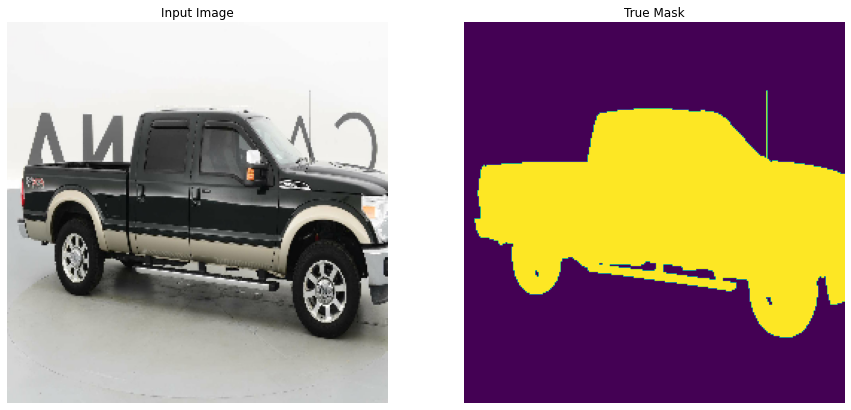

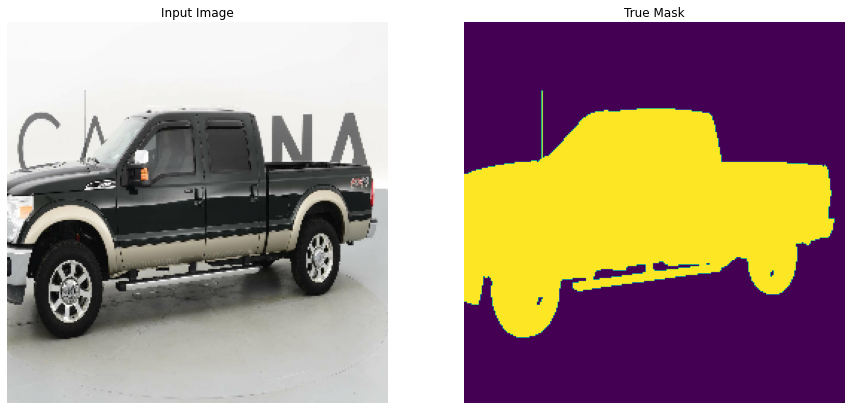

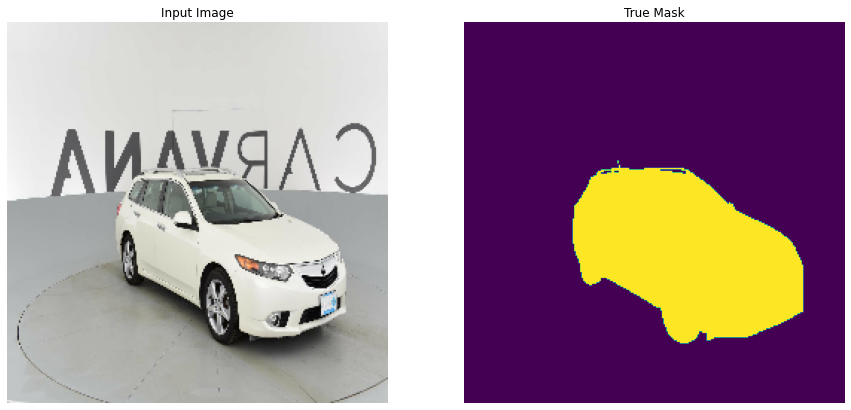

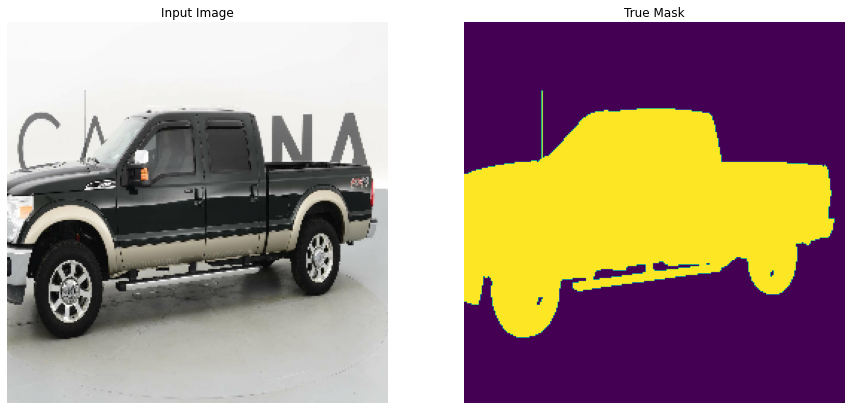

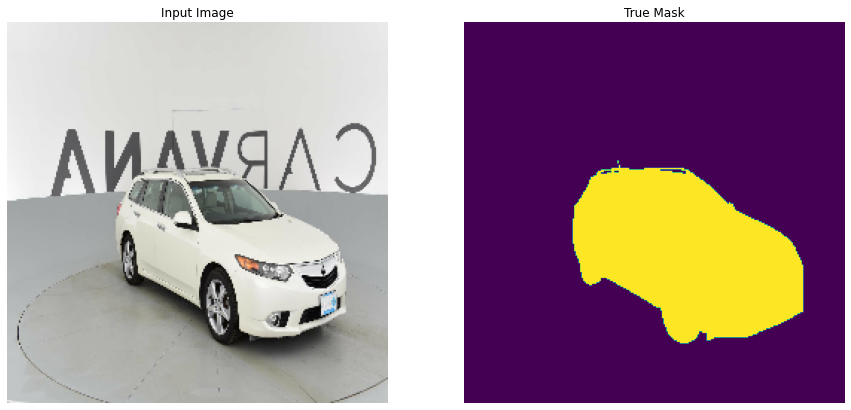

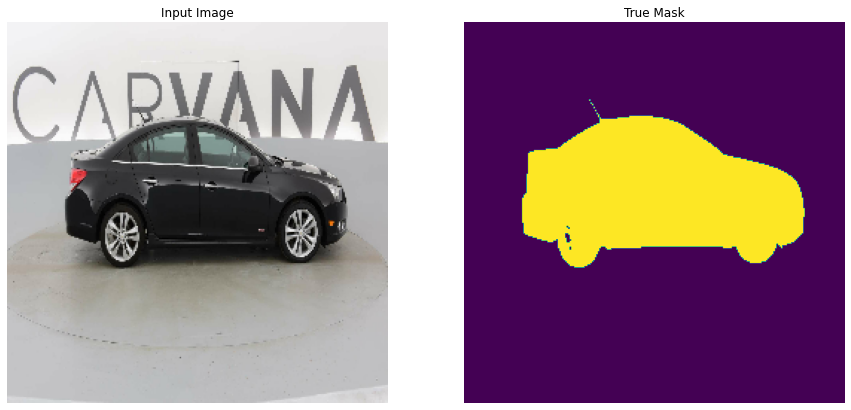

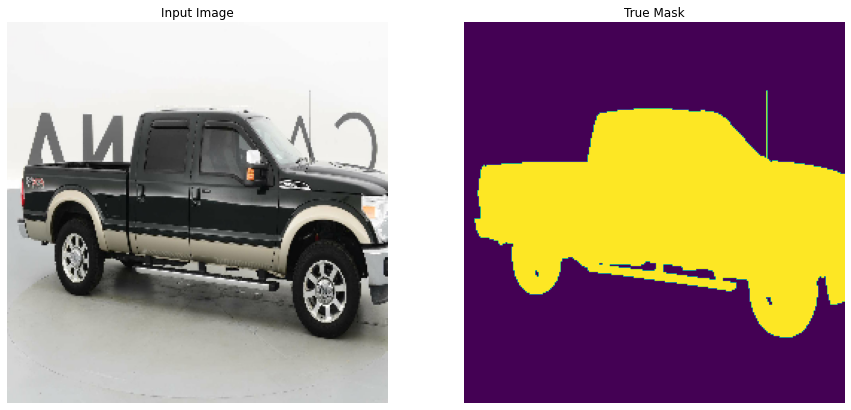

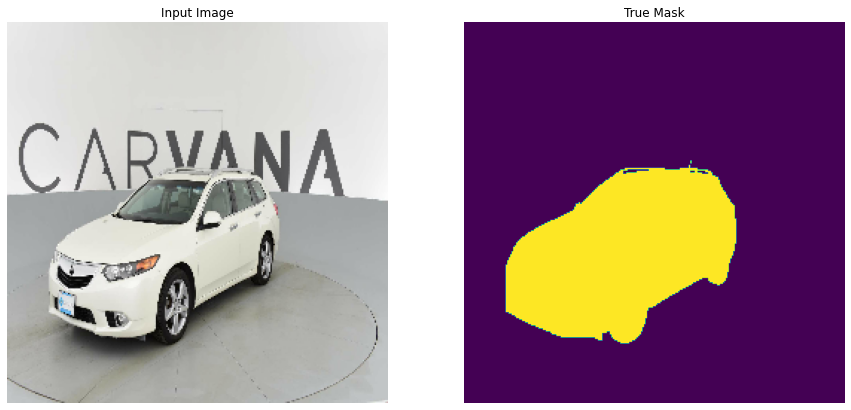

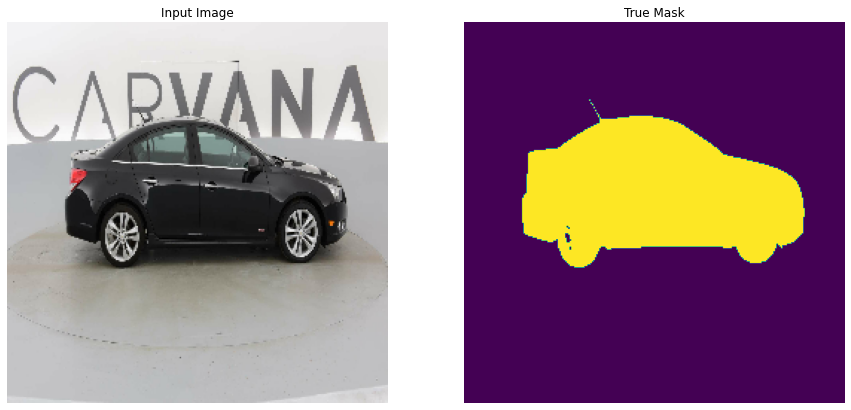

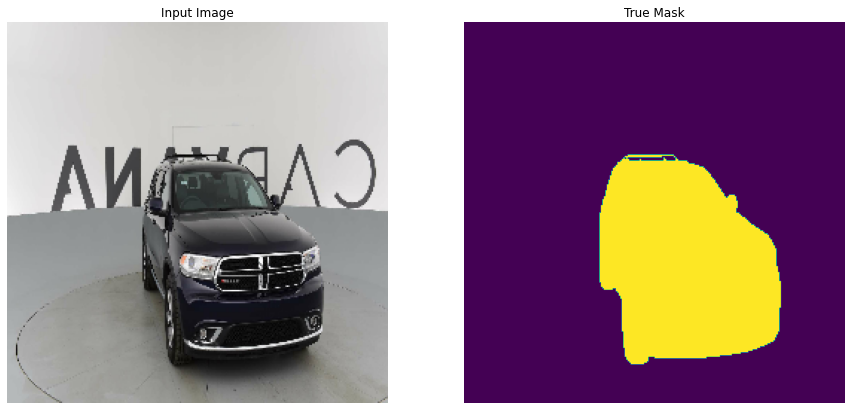

In [29]:
for i in range(5):
   for image, mask in train.take(i):
        sample_image, sample_mask = image, mask
        display([sample_image, sample_mask])

## Model

We are going to use U-Net model. A U-Net consists of an encoder (downsampler) and decoder (upsampler). In-order to learn robust features, and reduce the number of trainable parameters, a pretrained model can be used as the encoder.The encoder will be a pretrained MobileNetV2 model which is prepared and ready to use in tf.keras.applications.

In [30]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[256, 256, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)
down_stack.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [31]:
def upsample(filters, size, norm_type='batchnorm', apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)
    
    result = tf.keras.Sequential()
    result.add(
      tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                      padding='same',
                                      kernel_initializer=initializer,
                                      use_bias=False))

    if norm_type.lower() == 'batchnorm':
        result.add(tf.keras.layers.BatchNormalization())
    elif norm_type.lower() == 'instancenorm':
        result.add(InstanceNormalization())

    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.5))

        result.add(tf.keras.layers.ReLU())

    return result

up_stack = [
    upsample(512, 3),  # 4x4 -> 8x8
    upsample(256, 3),  # 8x8 -> 16x16
    upsample(128, 3),  # 16x16 -> 32x32
    upsample(64, 3),   # 32x32 -> 64x64
]

In [32]:
def unet_model(output_channels):
    inputs = tf.keras.layers.Input(shape=[256, 256, 3])

    # Downsampling through the model
    skips = down_stack(inputs)
    x = skips[-1]
    skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])

  # This is the last layer of the model
    last = tf.keras.layers.Conv2DTranspose(
      output_channels, 3, strides=2, activation='sigmoid',
      padding='same')  #64x64 -> 128x128

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

## Train the Model

Now let's compile the model and see the model architecture



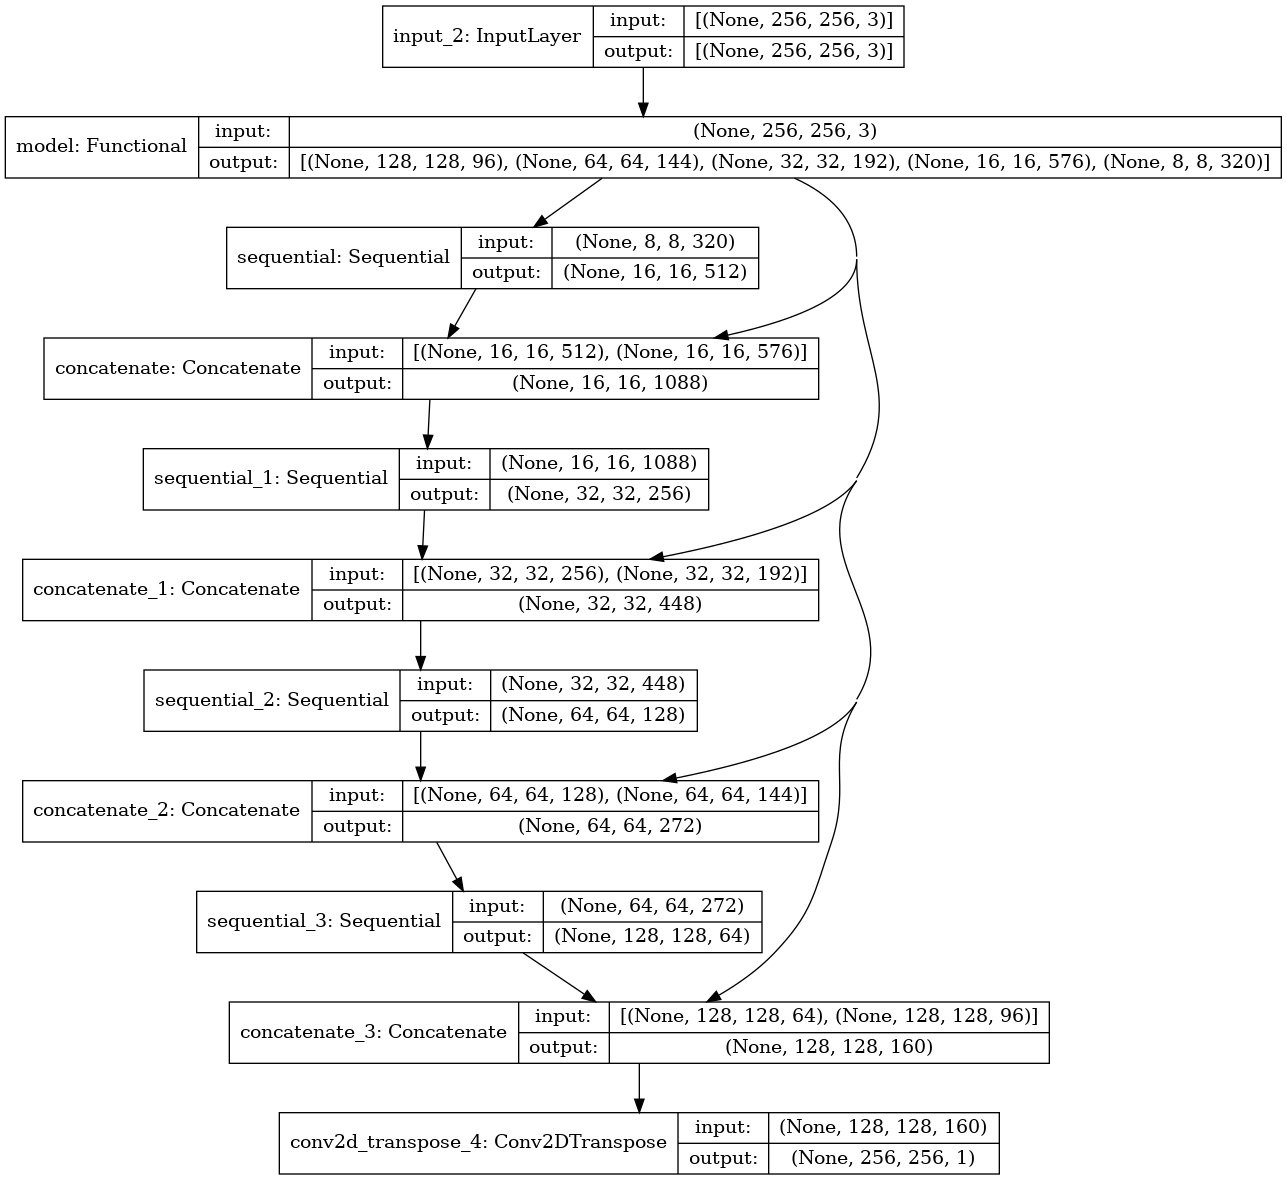

In [33]:
def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)

def dice_loss(in_gt, in_pred):
    return 1-dice_coef(in_gt, in_pred)

model = unet_model(1)

model.compile(optimizer='adam',
              loss = dice_loss,
              metrics=[dice_coef,'binary_accuracy'])

tf.keras.utils.plot_model(model, show_shapes=True)

Let's try out the model to see what it predicts before training.



2023-01-14 20:23:45.951615: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 537 of 1000
2023-01-14 20:23:54.985867: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.
2023-01-14 20:23:55.832082: W tensorflow/core/kernels/data/cache_dataset_ops.cc:757] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2023-01-14 20:23:56.719114: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
2023-01-14 20:24:02.216586: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2023-01-14 20:24:03.071838: I ten

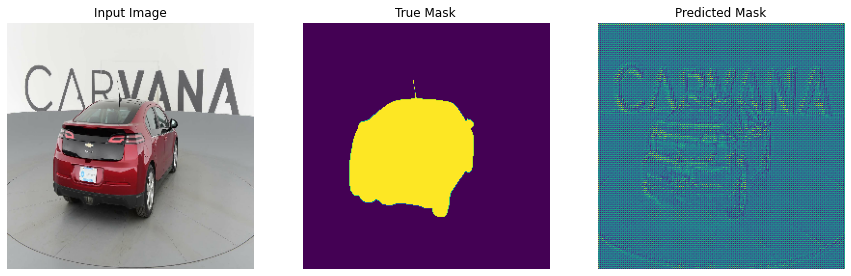

In [34]:
for images, masks in train_dataset.take(1):
    for img, mask in zip(images, masks):
        sample_image = img
        sample_mask = mask
        break
def visualize(display_list):
    plt.figure(figsize=(15, 15))
    title = ['Input Image', 'True Mask', 'Predicted Mask']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

def show_predictions(sample_image, sample_mask):
    pred_mask = model.predict(sample_image[tf.newaxis, ...])
    pred_mask = pred_mask.reshape(img_size[0],img_size[1],1)
    visualize([sample_image, sample_mask, pred_mask])
    
show_predictions(sample_image, sample_mask)

In [35]:
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
model (Functional)              [(None, 128, 128, 96 1841984     input_2[0][0]                    
__________________________________________________________________________________________________
sequential (Sequential)         (None, 16, 16, 512)  1476608     model[0][4]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 16, 16, 1088) 0           sequential[0][0]                 
                                                                 model[0][3]                

In [36]:
class DisplayCallback(tf.keras.callbacks.Callback):
    def __init__(self, dataset, epoch_interval=3):
        self.dataset = dataset
        self.epoch_interval = epoch_interval
    
    def display(self, display_list, extra_title=''):
        plt.figure(figsize=(15, 15))
        title = ['Input Image', 'True Mask', 'Predicted Mask']

        if len(display_list) > len(title):
            title.append(extra_title)

        for i in range(len(display_list)):
            plt.subplot(1, len(display_list), i+1)
            plt.title(title[i])
            plt.imshow(display_list[i])
            plt.axis('off')
        plt.show()
        
    def create_mask(self, pred_mask):
        pred_mask = (pred_mask > 0.5).astype("int32")
        return pred_mask[0]
    
    def show_predictions(self, dataset, num=1):
        for image, mask in dataset.take(num):
            pred_mask = model.predict(image)
            self.display([image[0], mask[0], self.create_mask(pred_mask)])
    def on_epoch_end(self, epoch, logs=None):
        if epoch and epoch % self.epoch_interval == 0:
            self.show_predictions(self.dataset)
            print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

Let's observe how the model improves while it is training. To accomplish this task, a callback function is defined below.



Epoch 1/15


2023-01-14 20:24:16.722675: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 555 of 1000
2023-01-14 20:24:25.120223: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


238/238 [==============================] - 110s 369ms/step - loss: 0.1516 - dice_coef: 0.8484 - binary_accuracy: 0.9463 - val_loss: 0.0310 - val_dice_coef: 0.9689 - val_binary_accuracy: 0.9895
Epoch 2/15
238/238 [==============================] - 43s 179ms/step - loss: 0.0253 - dice_coef: 0.9747 - binary_accuracy: 0.9911 - val_loss: 0.0236 - val_dice_coef: 0.9764 - val_binary_accuracy: 0.9914
Epoch 3/15
238/238 [==============================] - 42s 178ms/step - loss: 0.0217 - dice_coef: 0.9783 - binary_accuracy: 0.9919 - val_loss: 0.0210 - val_dice_coef: 0.9790 - val_binary_accuracy: 0.9920
Epoch 4/15
238/238 [==============================] - 42s 177ms/step - loss: 0.0205 - dice_coef: 0.9795 - binary_accuracy: 0.9921 - val_loss: 0.0203 - val_dice_coef: 0.9797 - val_binary_accuracy: 0.9921
Epoch 5/15
238/238 [==============================] - 42s 178ms/step - loss: 0.0195 - dice_coef: 0.9805 - binary_accuracy: 0.9924 - val_loss: 0.0202 - val_dice_coef: 0.9798 - val_binary_accuracy: 0.

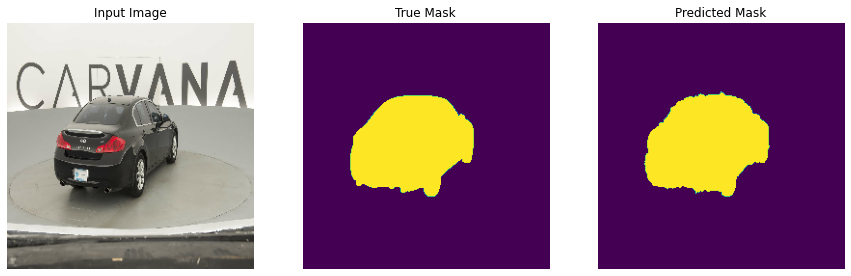


Sample Prediction after epoch 6

Epoch 7/15
238/238 [==============================] - 42s 175ms/step - loss: 0.0185 - dice_coef: 0.9815 - binary_accuracy: 0.9926 - val_loss: 0.0196 - val_dice_coef: 0.9804 - val_binary_accuracy: 0.9922
Epoch 8/15
238/238 [==============================] - 40s 170ms/step - loss: 0.0180 - dice_coef: 0.9820 - binary_accuracy: 0.9928 - val_loss: 0.0193 - val_dice_coef: 0.9806 - val_binary_accuracy: 0.9922
Epoch 9/15
238/238 [==============================] - 43s 180ms/step - loss: 0.0178 - dice_coef: 0.9822 - binary_accuracy: 0.9928 - val_loss: 0.0193 - val_dice_coef: 0.9807 - val_binary_accuracy: 0.9922
Epoch 10/15
238/238 [==============================] - 42s 178ms/step - loss: 0.0174 - dice_coef: 0.9826 - binary_accuracy: 0.9930 - val_loss: 0.0201 - val_dice_coef: 0.9798 - val_binary_accuracy: 0.9919
Epoch 11/15
238/238 [==============================] - 43s 179ms/step - loss: 0.0176 - dice_coef: 0.9824 - binary_accuracy: 0.9928 - val_loss: 0.0194 - v

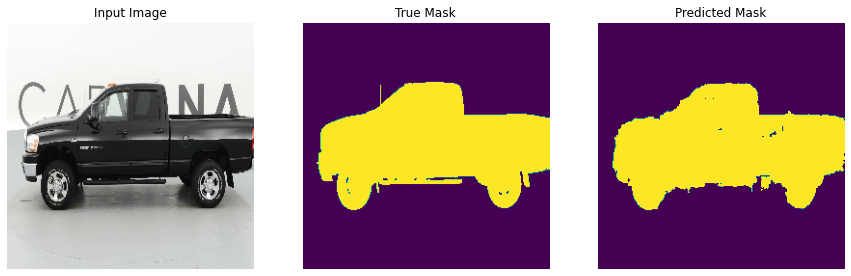


Sample Prediction after epoch 11

Epoch 12/15
238/238 [==============================] - 42s 178ms/step - loss: 0.0171 - dice_coef: 0.9829 - binary_accuracy: 0.9930 - val_loss: 0.0183 - val_dice_coef: 0.9817 - val_binary_accuracy: 0.9925
Epoch 13/15
238/238 [==============================] - 42s 178ms/step - loss: 0.0170 - dice_coef: 0.9830 - binary_accuracy: 0.9930 - val_loss: 0.0181 - val_dice_coef: 0.9818 - val_binary_accuracy: 0.9926
Epoch 14/15
238/238 [==============================] - 42s 179ms/step - loss: 0.0167 - dice_coef: 0.9833 - binary_accuracy: 0.9931 - val_loss: 0.0183 - val_dice_coef: 0.9817 - val_binary_accuracy: 0.9925
Epoch 15/15
238/238 [==============================] - 43s 180ms/step - loss: 0.0165 - dice_coef: 0.9835 - binary_accuracy: 0.9932 - val_loss: 0.0183 - val_dice_coef: 0.9817 - val_binary_accuracy: 0.9925


In [37]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=4,restore_best_weights=True)

EPOCHS = 15
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_data=valid_dataset,
                          callbacks=[DisplayCallback(train_dataset), early_stop])


In [41]:
test_zip = "/kaggle/input/carvana-image-masking-challenge/test.zip"
with ZipFile(test_zip, 'r') as zip_: 
    zip_.extractall('/kaggle/working')

In [54]:
def prefetch_test(car_path):
    car_img = tf.io.read_file(car_path) 
    car_img = tf.image.decode_jpeg(car_img, channels=3)
    car_img = tf.image.resize(car_img, img_size)
    car_img = tf.cast(car_img, tf.float32) / 255.0
    return car_img

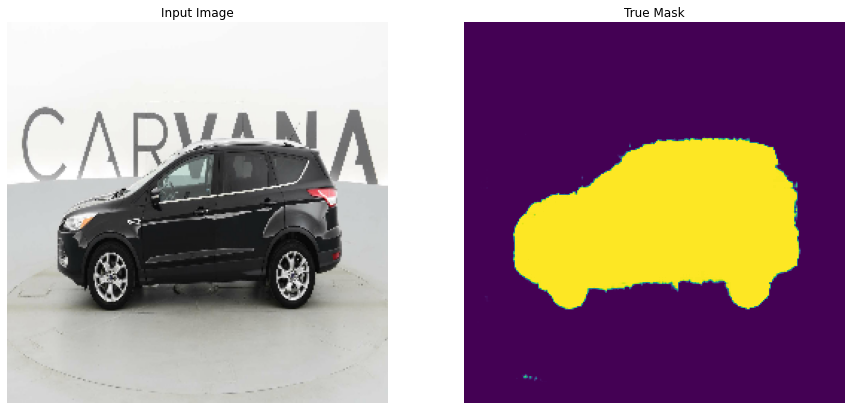

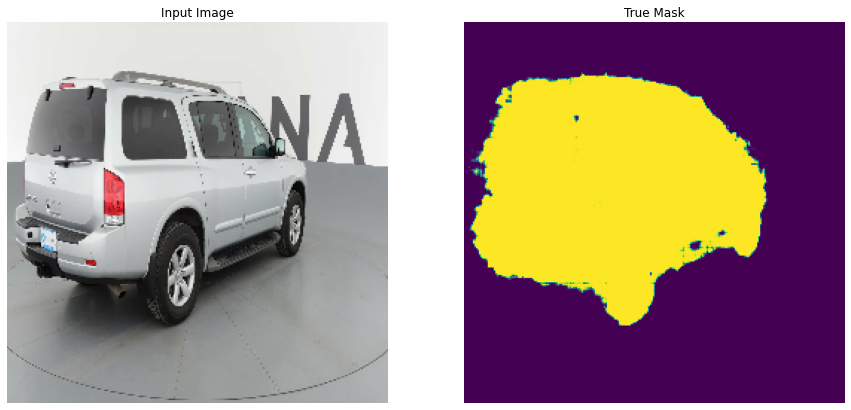

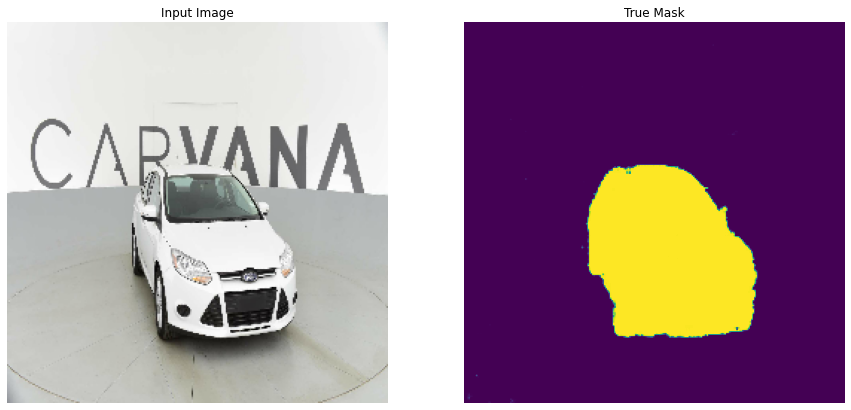

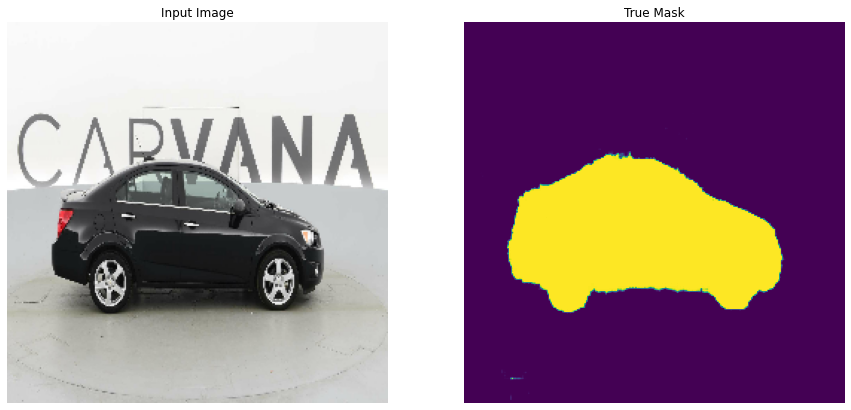

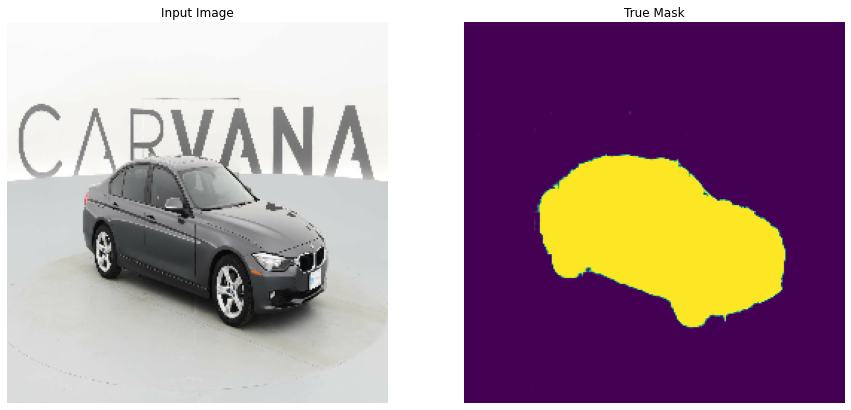

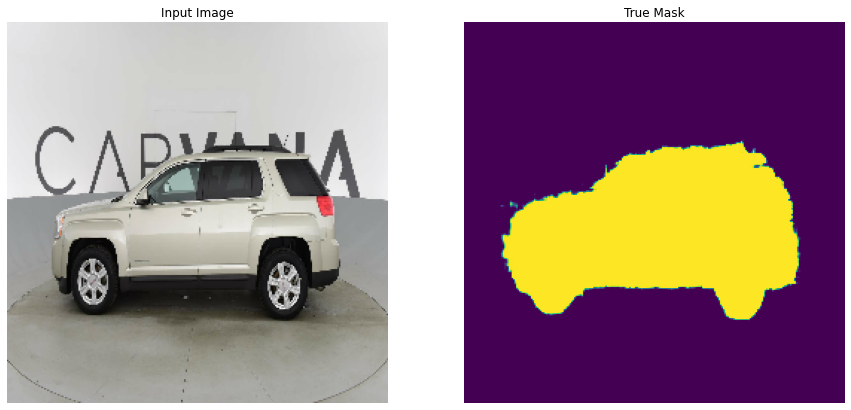

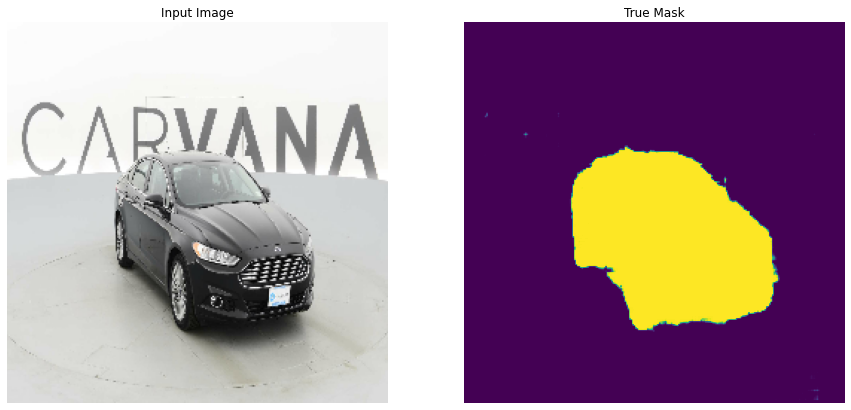

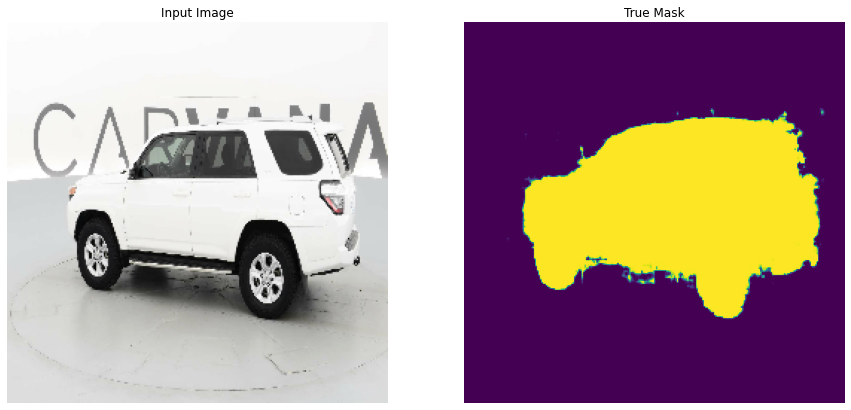

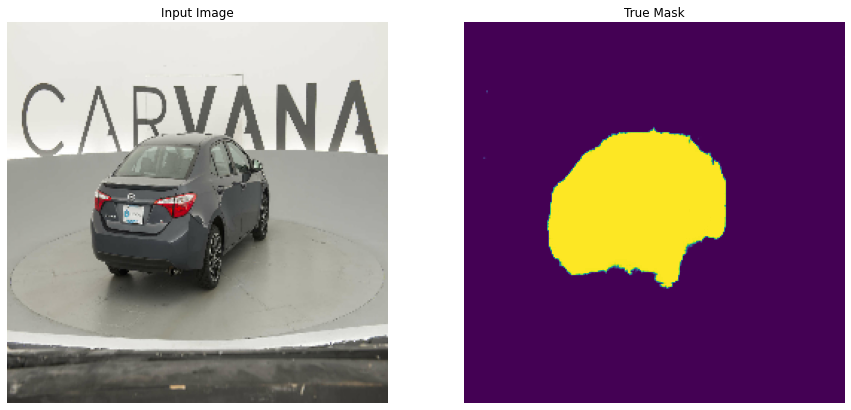

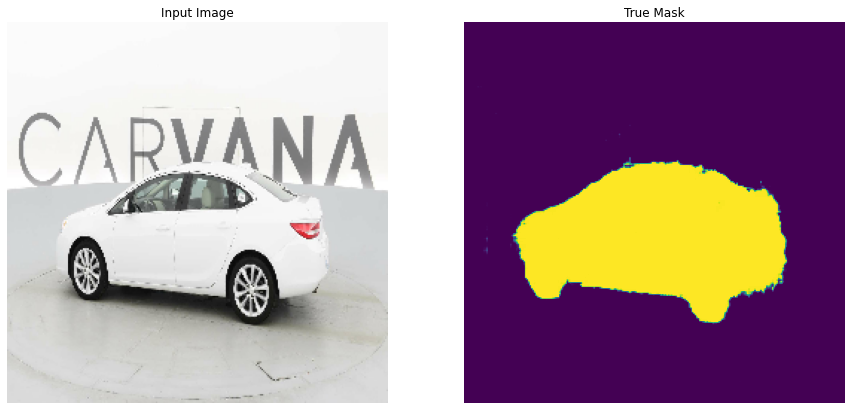

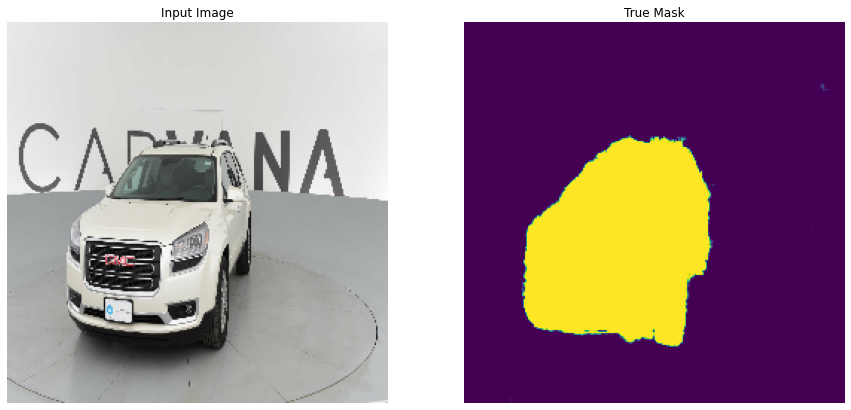

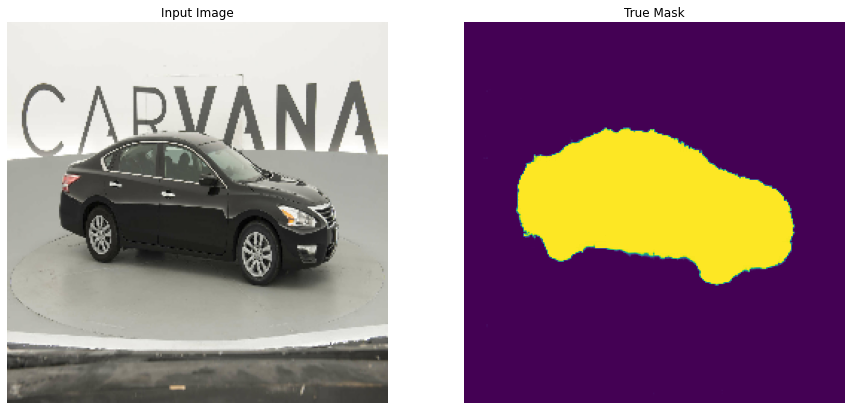

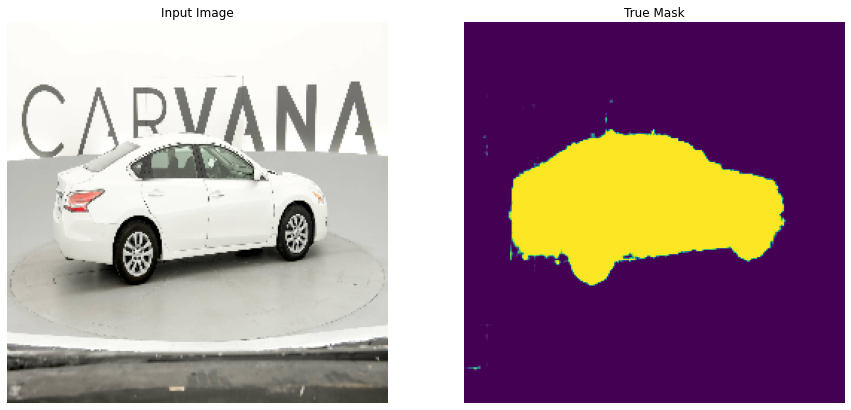

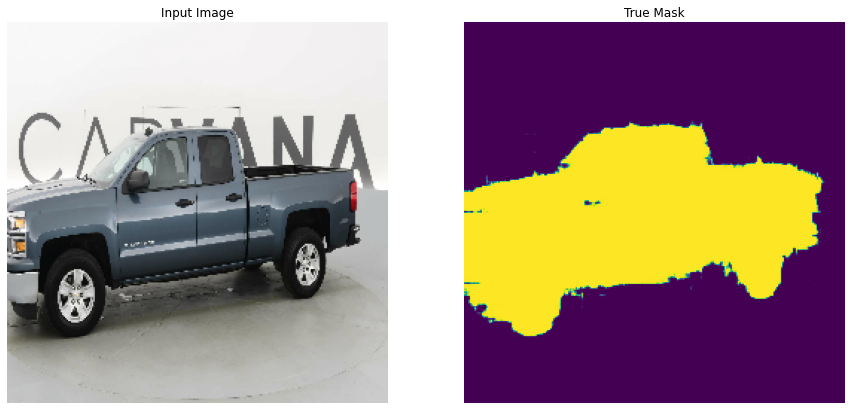

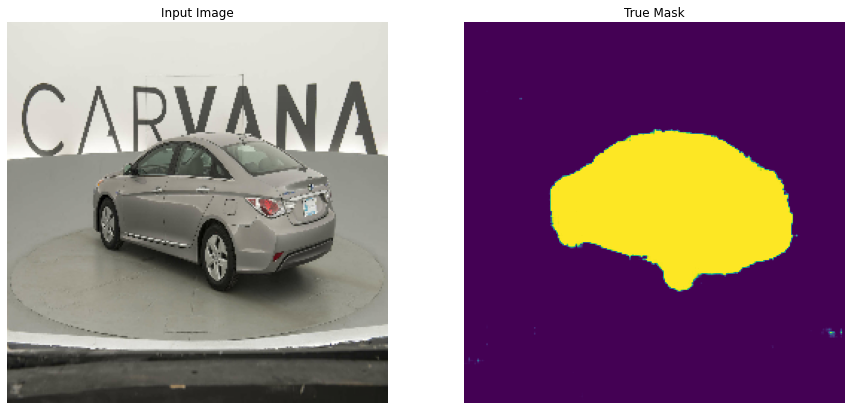

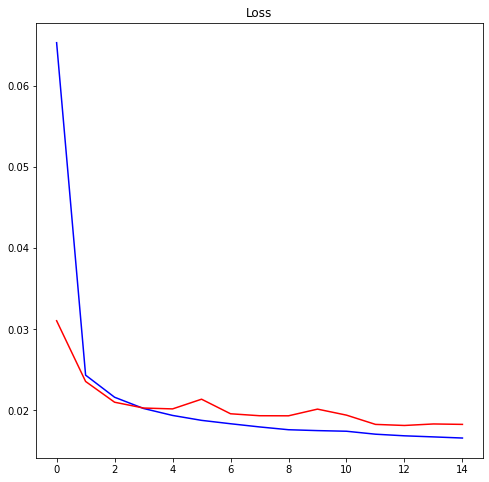

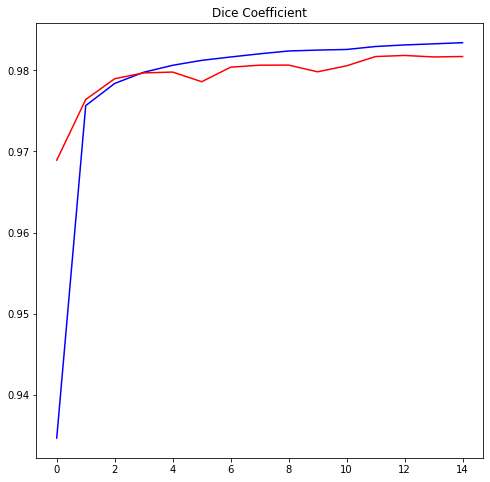

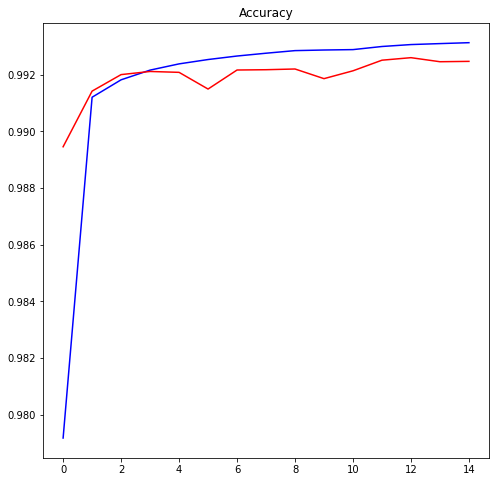

In [56]:
test_dir = "/kaggle/working/test/"

test_images = os.listdir(test_dir)
test_images = [test_dir + i for i in test_images]

test_dataset = tf.data.Dataset.from_tensor_slices(test_images)
test_dataset = test_dataset.map(prefetch_test, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE)

for n, image in enumerate(test_dataset.take(15)):
    pr_mask = model.predict(image)
    visualize([image[0], pr_mask[0]])

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_title('Loss')
ax.plot(model_history.history['loss'], color='b', label='loss')
ax.plot(model_history.history['val_loss'], color='r', label='val_loss')

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_title('Dice Coefficient')
ax.plot(model_history.history['dice_coef'], color='b', label='dice_coef')
ax.plot(model_history.history['val_dice_coef'], color='r', label='val_dice_coef')

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_title('Accuracy')
ax.plot(model_history.history['binary_accuracy'], color='b', label='binary_accuracy')
ax.plot(model_history.history['val_binary_accuracy'], color='r', label='val_binary_accuracy')
